In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('data_1.csv')
df.head()

,date,kosave,kosave_quant,kosave_amt,bc,ar,unsoldapt,tr_bond,loan_apt,cd,...,termdepo,interrate_call,interrate_kb,cpi_jeon,cpi_total,ppi_realestate,ppi_buildlease,cci,cli,SPI
0,2007-01-01,1379.25,192731575,2582501187,112303.8,1780.0,697,4.97,8.12,4.92,...,449295.9,4.63,4.5,75.314,77.573,84.80,89.04,68.2,72.0,75.32
1,2007-02-01,1434.89,230584554,3353641271,114057.2,2019.1,590,4.91,11.67,4.95,...,451327.1,4.60,4.5,75.536,77.725,84.88,89.21,68.7,72.3,75.21
2,2007-03-01,1431.62,276749496,3149139880,117768.3,2492.0,687,4.79,7.88,4.94,...,452615.8,4.60,4.5,75.683,77.878,85.04,89.39,69.5,72.5,75.92
3,2007-04-01,1517.12,373783291,4472297898,116494.6,2590.4,685,4.94,9.63,4.95,...,456907.0,4.69,4.5,75.904,78.031,85.31,89.56,70.3,72.8,75.36
4,2007-05-01,1614.94,416322121,5060726750,119064.5,2475.5,704,5.10,8.22,5.04,...,461735.9,4.61,4.5,76.126,78.259,85.40,89.65,70.9,73.1,74.34


In [3]:
# 날짜 인덱스 설정
df = df.set_index('date')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 2007-01-01 to 2012-12-01
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   kosave            72 non-null     float64
 1   kosave_quant      72 non-null     int64  
 2   kosave_amt        72 non-null     int64  
 3   bc                72 non-null     float64
 4   ar                72 non-null     float64
 5   unsoldapt         72 non-null     int64  
 6   tr_bond           72 non-null     float64
 7   loan_apt          72 non-null     float64
 8   cd                72 non-null     float64
 9   houseloan_county  72 non-null     float64
 10  houseloan_seoul   72 non-null     float64
 11  cash_cur          72 non-null     float64
 12  deli_ratio        72 non-null     float64
 13  termdepo          72 non-null     float64
 14  interrate_call    72 non-null     float64
 15  interrate_kb      72 non-null     float64
 16  cpi_jeon          72 non-null     

In [4]:
# 2007.01 ~ 2012.12
df.index

Index(['2007-01-01', '2007-02-01', '2007-03-01', '2007-04-01', '2007-05-01',
       '2007-06-01', '2007-07-01', '2007-08-01', '2007-09-01', '2007-10-01',
       '2007-11-01', '2007-12-01', '2008-01-01', '2008-02-01', '2008-03-01',
       '2008-04-01', '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
       '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01', '2009-01-01',
       '2009-02-01', '2009-03-01', '2009-04-01', '2009-05-01', '2009-06-01',
       '2009-07-01', '2009-08-01', '2009-09-01', '2009-10-01', '2009-11-01',
       '2009-12-01', '2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
       '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01', '2010-09-01',
       '2010-10-01', '2010-11-01', '2010-12-01', '2011-01-01', '2011-02-01',
       '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01',
       '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
       '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01',

In [5]:
# data, target 나누기
X = df.iloc[:, :-1]
y = df.SPI
print(X.shape)
print(y.shape)

(72, 22)
(72,)


In [6]:
# train, test 나누기 = 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3, random_state=42)

# 데이터 개수 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(50, 22) (22, 22) (50,) (22,)


In [7]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# RMSE, MAE, MAPE, MASE
from sklearn.metrics import mean_squared_error, mean_absolute_error
# RMSE = np.sqrt(mean_squared_error(y_valid, y_pred))    # root
# MAE = mean_absolute_error(y_valid, y_pred)

In [8]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# MAPE = mean_absolute_percentage_error(y_valid, y_pred)

In [9]:
# MASE
def mean_absolute_scaled_error(training_series, testing_series, prediction_series):
    """
    Computes the MEAN-ABSOLUTE SCALED ERROR forcast error for univariate time series prediction.
    
    See "Another look at measures of forecast accuracy", Rob J Hyndman
    
    parameters:
        training_series: the series used to train the model, 1d numpy array
        testing_series: the test series to predict, 1d numpy array or float
        prediction_series: the prediction of testing_series, 1d numpy array (same size as testing_series) or float
        absolute: "squares" to use sum of squares and root the result, "absolute" to use absolute values.
    
    """
    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

# MASE = mean_absolute_scaled_error(y_train, y_valid, y_pred)

In [17]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [23]:
pipe = Pipeline([("scaler", RobustScaler()),
                 ("svr", SVR())])

param = {'svr__kernel':('linear', 'ploy', 'sigmoid', 'rbf'), 
         'svr__C': [10, 30, 50, 100], 
         'svr__degree': [1,3,5,10],
         'svr__gamma': [0.1, 0.2, 0.5, 5]}

kf = KFold(n_splits=10)
grid = GridSearchCV(pipe, param_grid=param, cv=kf, scoring='neg_mean_squared_error')

# 점수
grid.fit(X_train, y_train)
# grid.best_score_

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [10, 30, 50, 100],
                         'svr__degree': [1, 3, 5, 10],
                         'svr__gamma': [0.1, 0.2, 0.5, 5],
                         'svr__kernel': ('linear', 'ploy', 'sigmoid', 'rbf')},
             scoring='neg_mean_squared_error')

In [24]:
#RMSE
np.sqrt(grid.best_score_*-1)

2.3445438463203225

In [25]:
grid.best_params_

{'svr__C': 100, 'svr__degree': 1, 'svr__gamma': 0.1, 'svr__kernel': 'rbf'}

In [26]:
y_pred = grid.predict(X_test).reshape(-1,1)
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,81.977579
1,80.996090
2,79.474055
3,82.263387
4,80.433665
5,79.466054
6,78.911971
7,78.911897
8,78.911897
9,78.911897


In [27]:
# 검증 예측
a = pd.DataFrame(y_test)
a['predict'] = y_pred.values
a.rename(columns = {'SPI':'true'}, inplace=True)
a

,true,predict
date,,
2011-03-01,83.35,81.977579
2011-04-01,82.78,80.996090
2011-05-01,82.20,79.474055
2011-06-01,81.70,82.263387
2011-07-01,81.77,80.433665
2011-08-01,81.93,79.466054
2011-09-01,81.76,78.911971
2011-10-01,81.15,78.911897
2011-11-01,80.43,78.911897


In [28]:
# 훈련 예측
y_pred_train = grid.predict(X_train).reshape(-1,1)
y_pred_train = pd.DataFrame(y_pred_train)

In [29]:
b = pd.DataFrame(y_train)
b['predict'] = y_pred_train.values
b.rename(columns={'SPI':'true'}, inplace=True)
b

,true,predict
date,,
2007-01-01,75.32,75.420325
2007-02-01,75.21,75.109728
2007-03-01,75.92,75.819968
2007-04-01,75.36,75.259485
2007-05-01,74.34,74.439930
2007-06-01,75.93,75.869033
2007-07-01,76.60,76.699978
2007-08-01,77.08,76.979755
2007-09-01,77.22,77.320247


In [33]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 2011-03-01 to 2012-12-01
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   true     22 non-null     float64
 1   predict  22 non-null     float64
dtypes: float64(2)
memory usage: 528.0+ bytes


In [34]:
b.shape

(50, 2)

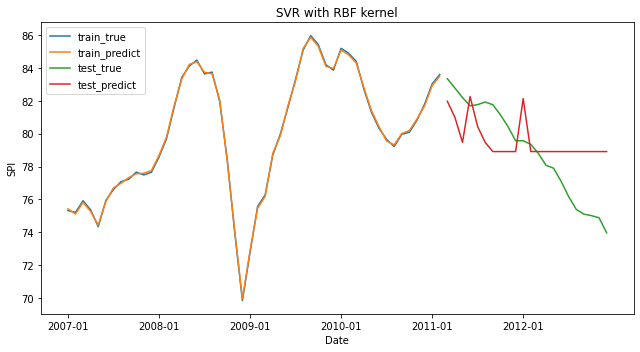

In [49]:
# 시각화
fig = plt.figure(figsize=(9,5))
grid = fig.add_subplot(1,1,1)
grid.plot(b['true'], label='train_true')
grid.plot(b['predict'], label='train_predict')
grid.plot(a['true'], label='test_true')
grid.plot(a['predict'], label='test_predict')

grid.set_title('SVR with RBF kernel')
plt.xticks(np.arange(0, 72, 12),
           labels=['2007-01', '2008-01', '2009-01','2010-01','2011-01', '2012-01'])
grid.set_xlabel('Date', fontsize=10)
grid.set_ylabel('SPI',fontsize=10)
# plt.xticks(fontsize=13, rotation=70, )
grid.legend(loc='upper left')

# fig.autofmt_xdate()
plt.tight_layout()

plt.show()

### Scale

In [52]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scaler_rb = RobustScaler()
scaler_mm = MinMaxScaler()
scaler_sd = StandardScaler()

In [53]:
# scaling
X_train_rb = scaler_rb.fit_transform(X_train)
X_test_rb = scaler_rb.transform(X_test)

X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)

X_train_sd = scaler_sd.fit_transform(X_train)
X_test_sd = scaler_sd.transform(X_test)

## 튜닝

In [183]:
# 튜닝2
svr_rbf = SVR(kernel='rbf', C=500, gamma=0.038 )


# 학습
svr_rbf.fit(X_train_rb, y_train)
# grid.best_score_

y_pred_test= svr_rbf.predict(X_test_rb)
y_pred_train = svr_rbf.predict(X_train_rb)

print(svr_rbf.score(X_train_rb, y_train))
print(svr_rbf.score(X_test_rb, y_test))

0.9993528357542925
0.37240733510414614


In [184]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
MAE = mean_absolute_error(y_test, y_pred_test)
print(RMSE)
print(MAE)

2.28086493510236
1.919284188106271


In [180]:
y_pred_train = y_pred_train.reshape(-1,1)
y_pred_test = y_pred_test.reshape(-1,1)

y_pred_train = pd.DataFrame(y_pred_train)
y_pred_test = pd.DataFrame(y_pred_test)

df_train = pd.DataFrame(y_train)
df_test = pd.DataFrame(y_test)

df_train['predict'] = y_pred_train.values
df_test['predict'] = y_pred_test.values

df_train.rename(columns={'SPI':'true'}, inplace=True)
df_test.rename(columns={'SPI':'true'}, inplace=True)

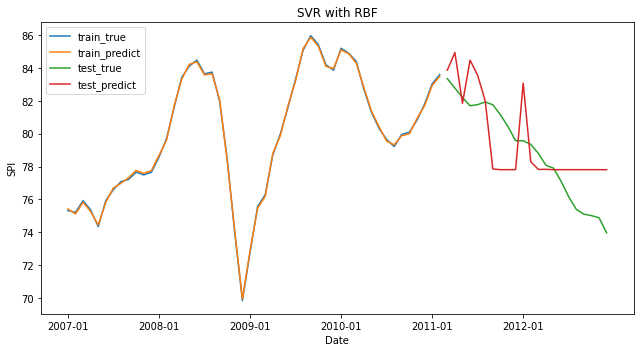

In [182]:
fig = plt.figure(figsize=(9,5))
grid = fig.add_subplot(1,1,1)
grid.plot(df_train['true'], label='train_true')
grid.plot(df_train['predict'], label='train_predict')
grid.plot(df_test['true'], label='test_true')
grid.plot(df_test['predict'], label='test_predict')

grid.set_title('SVR with RBF')
plt.xticks(np.arange(0, 72, 12),
           labels=['2007-01', '2008-01', '2009-01','2010-01','2011-01', '2012-01'])
grid.set_xlabel('Date', fontsize=10)
grid.set_ylabel('SPI',fontsize=10)
# plt.xticks(fontsize=13, rotation=70, )
grid.legend(loc='upper left')

# fig.autofmt_xdate()
plt.tight_layout()

plt.show()